In [7]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [8]:
analysis = scripts.Analysis()

In [9]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_3__2__4',
                          'getabsth_auto__auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.4__all.4__.4_.4_.9_.95',
                          'bigsum',
                          'option_wgt_1',
                          'crd_commitnumer',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [10]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_3__2__4',
                          'getabsth_auto__auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.4__all.4__.4_.4_.9_.95',
                          'bigsum',
                          'option_wgt_1',
                          'crd_commitnumer',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [12]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 9 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [13]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [14]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [15]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [16]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 9

nref = 3

p_refs = (/ 1,  10, 500 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 3,   2,   4 /)

data wgt
     &     /.4, .4, .4,
     &     .4, .4,
     &     .4, .4, .9, .95/

planck_wgt_flux = 2

option_wgt = 1

klin = 6.375563e-24

include 'mls75.pro'


In [17]:
fig.display_hrefanchor()

In [18]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [19]:
table_dgdgs.display_hrefanchor()

In [20]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [21]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [22]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

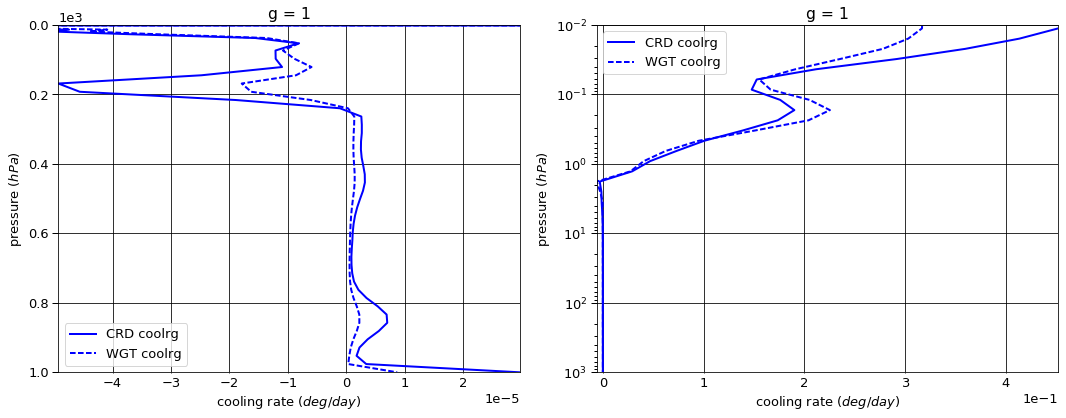

# Figure: cooling rate g-group 2

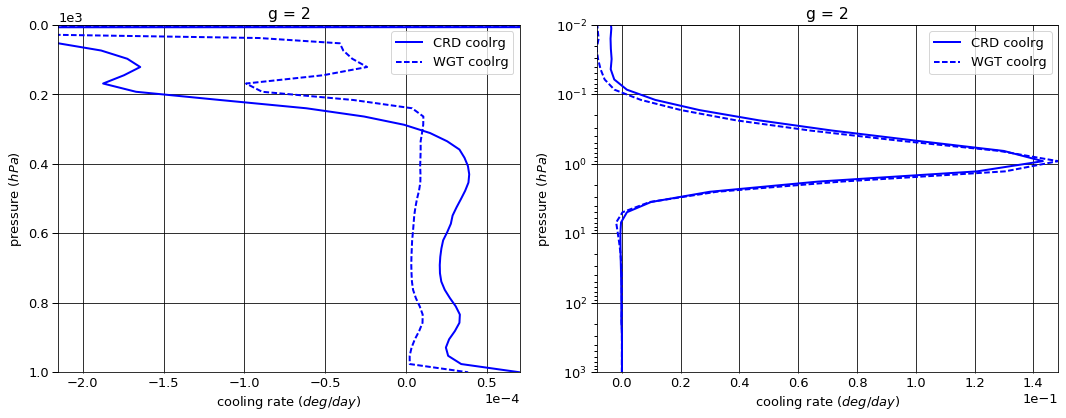

# Figure: cooling rate g-group 3

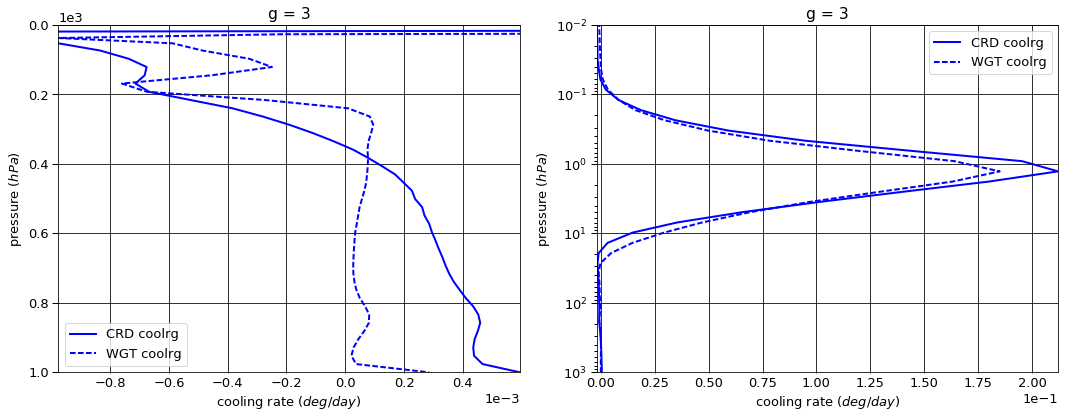

# Figure: cooling rate g-group 4

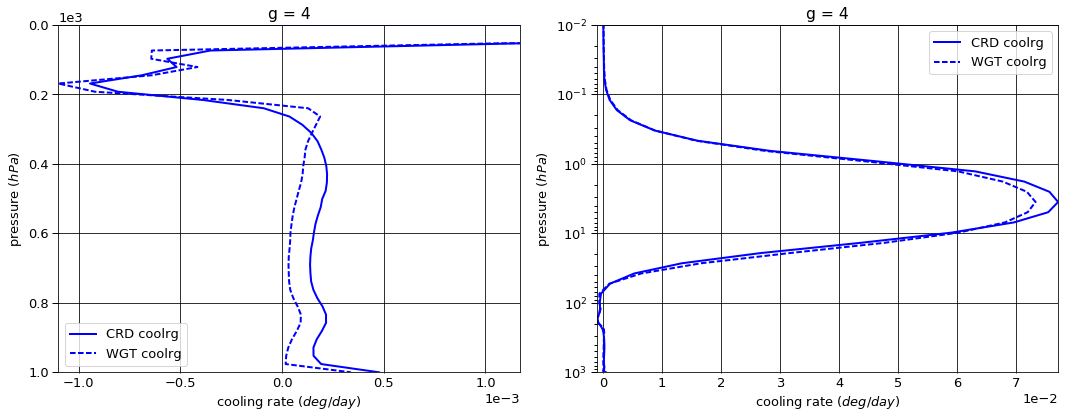

# Figure: cooling rate g-group 5

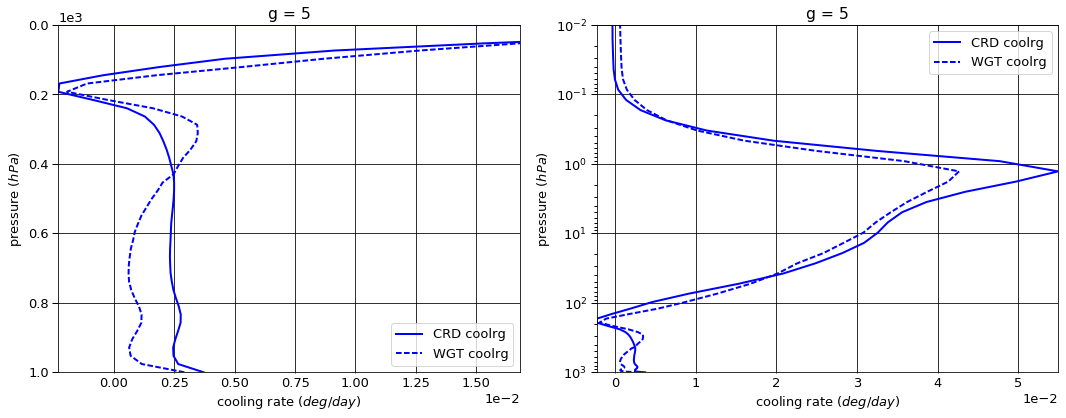

# Figure: cooling rate g-group 6

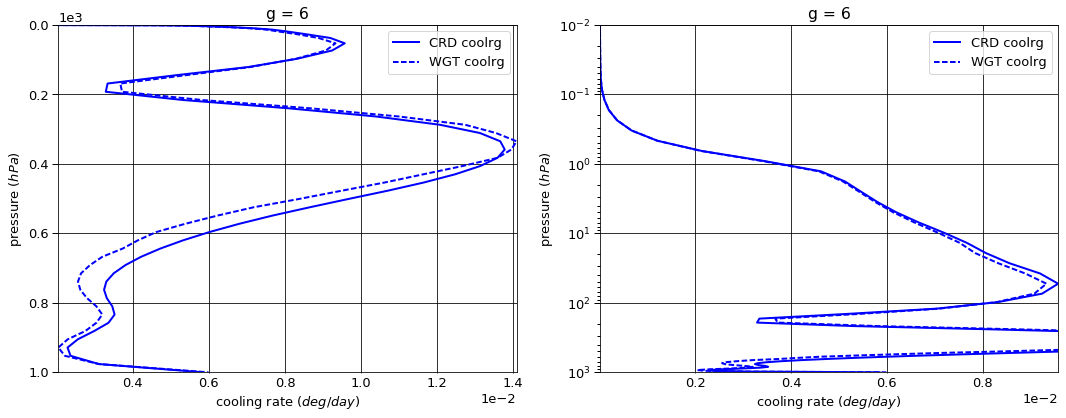

# Figure: cooling rate g-group 7

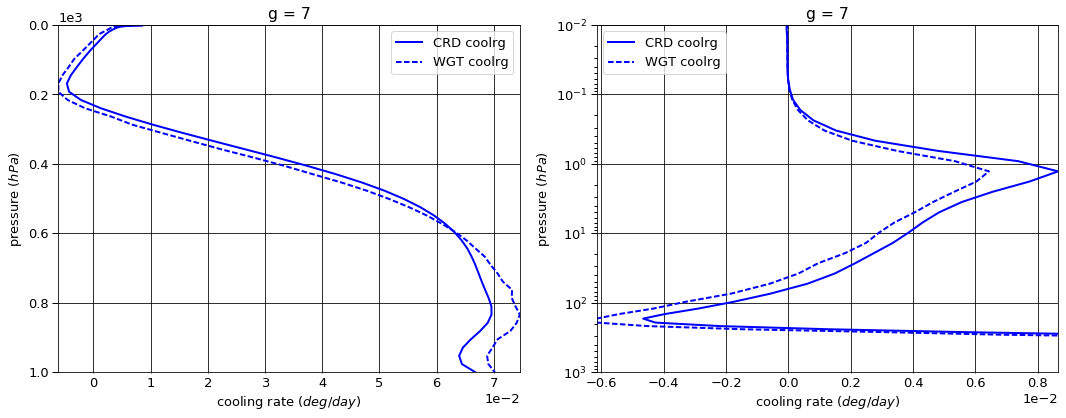

# Figure: cooling rate g-group 8

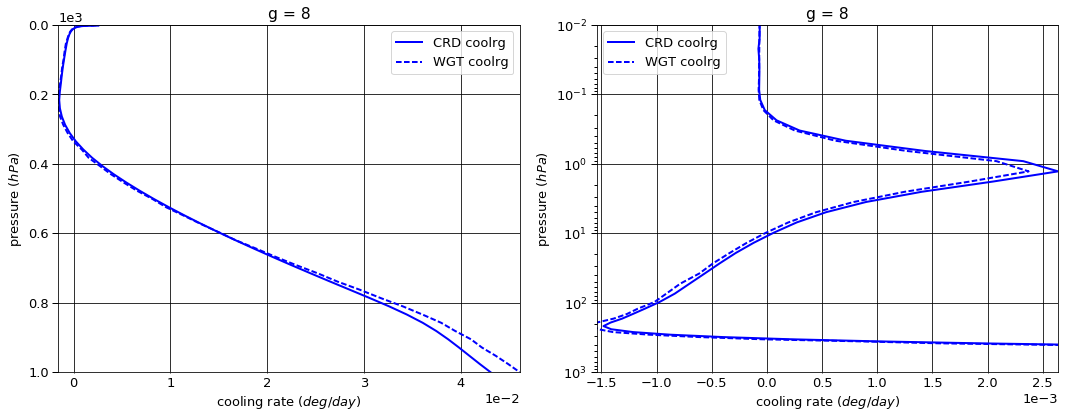

# Figure: cooling rate g-group 9

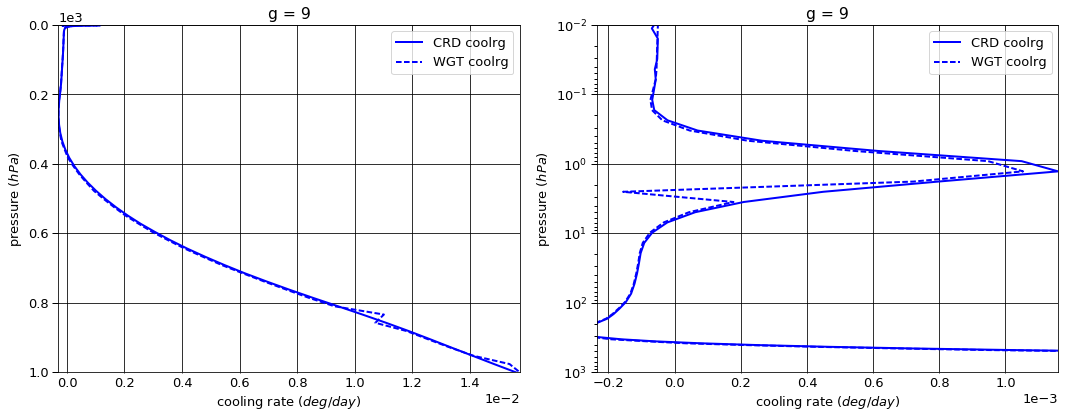

# Figure: cooling rate g-group total

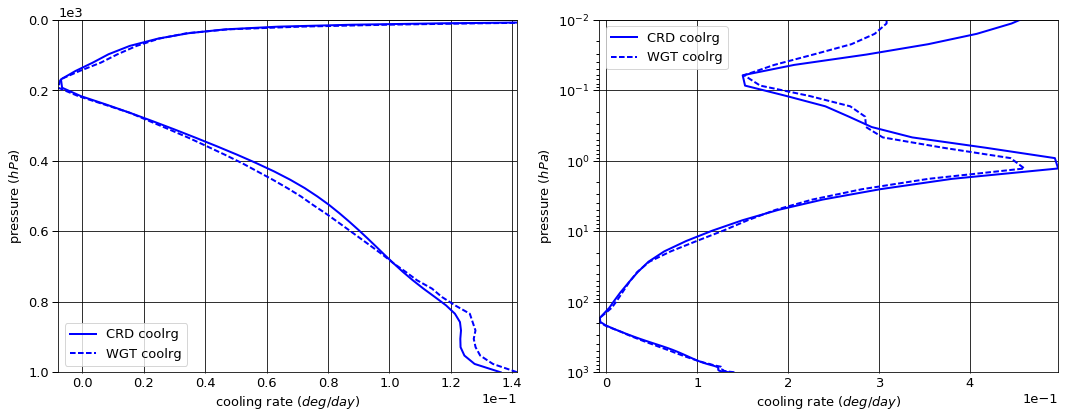

In [23]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [24]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.014466  0.000000  -0.014466
  1013.0   76     -0.037941  0.037847  -0.000094
2 0.0      1      -0.025032  0.000000  -0.025032
  1013.0   76     -0.039637  0.039172  -0.000465
3 0.0      1      -0.113902  0.000000  -0.113902
  1013.0   76     -0.206199  0.191331  -0.014868
4 0.0      1      -0.163208  0.000000  -0.163208
  1013.0   76     -0.399625  0.395972  -0.003653
5 0.0      1      -0.518990  0.000000  -0.518990
  1013.0   76     -1.284243  1.188531  -0.095712
6 0.0      1      -0.864359  0.000000  -0.864359
  1013.0   76     -2.275827  2.244898  -0.030928
7 0.0      1      -6.318527  0.000000  -6.318527
  1013.0   76     -9.673479  8.169070  -1.504409
8 0.0      1      -6.315205  0.000000  -6.315205
  1013.0   76     -6.944650  2.322749  -4.621902
9 0.0      1     -11.645191  0.000000 -11.645191
  1013.0   76    -11.775941  0.613046 -11.162895


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.014122  0.000000  -0.014122
  1013.0   76     -0.037941  0.037917  -0.000024
2 0.0      1      -0.025719  0.000000  -0.025719
  1013.0   76     -0.039637  0.039528  -0.000109
3 0.0      1      -0.103393  0.000000  -0.103393
  1013.0   76     -0.206199  0.205335  -0.000865
4 0.0      1      -0.160155  0.000000  -0.160155
  1013.0   76     -0.399625  0.398674  -0.000952
5 0.0      1      -0.398351  0.000000  -0.398351
  1013.0   76     -1.284243  1.271776  -0.012467
6 0.0      1      -0.819154  0.000000  -0.819154
  1013.0   76     -2.275827  2.246216  -0.029611
7 0.0      1      -6.349131  0.000000  -6.349131
  1013.0   76     -9.673479  8.153514  -1.519966
8 0.0      1      -6.304348  0.000000  -6.304348
  1013.0   76     -6.944650  2.393129  -4.551521
9 0.0      1     -11.645894  0.000000 -11.645894
  1013.0   76    -11.775941  0.610301 -11.165640


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.000343  0.000000  0.000343
  1013.0   76     0.000000  0.000069  0.000069
2 0.0      1     -0.000687  0.000000 -0.000687
  1013.0   76     0.000000  0.000356  0.000356
3 0.0      1      0.010509  0.000000  0.010509
  1013.0   76     0.000000  0.014003  0.014003
4 0.0      1      0.003053  0.000000  0.003053
  1013.0   76     0.000000  0.002701  0.002701
5 0.0      1      0.120639  0.000000  0.120639
  1013.0   76     0.000000  0.083245  0.083245
6 0.0      1      0.045206  0.000000  0.045206
  1013.0   76     0.000000  0.001318  0.001318
7 0.0      1     -0.030604  0.000000 -0.030604
  1013.0   76     0.000000 -0.015557 -0.015557
8 0.0      1      0.010857  0.000000  0.010857
  1013.0   76     0.000000  0.070381  0.070381
9 0.0      1     -0.000703  0.000000 -0.000703
  1013.0   76     0.000000 -0.002744 -0.002745

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1      0.468105
  1001.112500 75     0.000030
2 0.000312    1     -0.006274
  1001.112500 75     0.000070
3 0.000312    1     -0.002663
  1001.112500 75     0.000594
4 0.000312    1     -0.000008
  1001.112500 75     0.000477
5 0.000312    1     -0.000471
  1001.112500 75     0.003720
6 0.000312    1      0.000005
  1001.112500 75     0.005846
7 0.000312    1     -0.000052
  1001.112500 75     0.066816
8 0.000312    1     -0.000058
  1001.112500 75     0.043119
9 0.000312    1     -0.000042
  1001.112500 75     0.015603


WGT


coolrg
g pressure    layer          
1 0.000312    1      0.278132
  1001.112500 75     0.000009
2 0.000312    1     -0.010285
  1001.112500 75     0.000038
3 0.000312    1     -0.001816
  1001.112500 75     0.000285
4 0.000312    1      0.000020
  1001.112500 75     0.000339
5 0.000312    1      0.000376
  1001.112500 75     0.002931
6 0.000312    1      0.000007
  1001.112500 75     0.005990
7 0.000312    1     -0.000049
  1001.112500 75     0.070200
8 0.000312    1     -0.000060
  1001.112500 75     0.046133
9 0.000312    1     -0.000043
  1001.112500 75     0.015743


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.899725e-01
  1001.112500 75    -2.098229e-05
2 0.000312    1     -4.011475e-03
  1001.112500 75    -3.198905e-05
3 0.000312    1      8.472401e-04
  1001.112500 75    -3.095041e-04
4 0.000312    1      2.806395e-05
  1001.112500 75    -1.381058e-04
5 0.000312    1      8.469420e-04
  1001.112500 75    -7.889674e-04
6 0.000312    1      2.004575e-06
  1001.112500 75     1.437336e-04
7 0.000312    1      3.162623e-06
  1001.112500 75     3.383364e-03
8 0.000312    1     -1.509629e-06
  1001.112500 75     3.014025e-03
9 0.000312    1     -6.517790e-07
  1001.112500 75     1.400850e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.978879,0.000000,-25.978879
1013.0,76,-32.637543,15.202617,-17.434926



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.820267,0.00000,-25.820267
1013.0,76,-32.637543,15.35639,-17.281154



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.158612,0.000000,0.158612
1013.0,76,0.000000,0.153773,0.153773


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.458541
1001.112500,75,0.136275



WGT


,,coolrg
pressure,layer,
0.000312,1,0.266282
1001.112500,75,0.141666



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.192259
1001.112500,75,0.005392


In [25]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.001125,0.001193
2,0.001187,0.001235
3,0.006188,0.006422
4,0.011875,0.012540
5,0.038500,0.040013
6,0.067937,0.071126
7,0.290187,0.301164
8,0.213688,0.211927
9,0.369312,0.354380


In [26]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.076063e-19
2,1.947095e-20
3,1.826139e-21
4,1.678020e-21
5,1.581825e-22
6,5.839038e-22
7,6.102842e-23
8,6.378566e-24
9,2.959058e-25


In [29]:
def spreadsheet():
    ng = 9
    ng_refs = [3, 2, 4]
    p_refs = [1, 10, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [30]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.076063e-19,NaN,0.001125,0.001193,0.001125,0.001193,1.0
2,1.947095e-20,0.093788,0.001187,0.001235,0.002312,0.002428,1.0
3,1.826139e-21,0.093788,0.006188,0.006422,0.008500,0.008850,1.0
4,1.678020e-21,0.918890,0.011875,0.012540,0.020375,0.021390,10.0
5,1.581825e-22,0.094267,0.038500,0.040013,0.058875,0.061403,10.0
6,5.839038e-22,3.691330,0.067937,0.071126,0.126812,0.132529,500.0
7,6.102842e-23,0.104518,0.290187,0.301164,0.417000,0.433693,500.0
8,6.378566e-24,0.104518,0.213688,0.211927,0.630687,0.645620,500.0
9,2.959058e-25,0.046391,0.369312,0.354380,1.000000,1.000000,500.0


In [31]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [32]:
#pd.set_option('display.max_rows', None)
#display.display(
#    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
#                index_col=[0, 1],
#                sep=r'\s+')
#    )
#pd.reset_option('display.max_rows')

# Histogram of wavenumbers in g-group 1

In [33]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [34]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')